<a href="https://colab.research.google.com/github/saturnsz/SingleLayer-JST/blob/main/SingleLayerJST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_path = "/content/drive/MyDrive/train_data_eps1.xlsx"
test_path = "/content/drive/MyDrive/test_data_ eps1 (1).xlsx"

train_df = pd.read_excel(train_path)
test_df = pd.read_excel(test_path)

In [3]:
combined_locations = pd.concat([
    train_df['location'],
    test_df['location']
]).dropna().unique()

print(f"Total lokasi unik yang tersedia: {len(combined_locations)}")

Total lokasi unik yang tersedia: 6434


In [5]:
na_mask_train = train_df['location'].isna()
train_df.loc[na_mask_train, 'location'] = np.random.choice(
    combined_locations,
    size=na_mask_train.sum()
)

na_mask_test = test_df['location'].isna()
test_df.loc[na_mask_test, 'location'] = np.random.choice(
    combined_locations,
    size=na_mask_test.sum()
)

In [6]:
print("\nSisa missing value:")
print("Train:", train_df['location'].isna().sum())
print("Test:", test_df['location'].isna().sum())


Sisa missing value:
Train: 0
Test: 0


In [9]:
train_output = "/content/sample_data/train_data_filled_location.xlsx"
test_output = "/content/sample_data/test_data_filled_location.xlsx"

train_df.to_excel(train_output, index=False)
test_df.to_excel(test_output, index=False)

print("\n✔ Selesai! Semua missing value sudah terisi dengan lokasi realistis.")
print(f"📁 Train saved at: {train_output}")
print(f"📁 Test saved at:  {test_output}")



✔ Selesai! Semua missing value sudah terisi dengan lokasi realistis.
📁 Train saved at: /content/sample_data/train_data_filled_location.xlsx
📁 Test saved at:  /content/sample_data/test_data_filled_location.xlsx


In [21]:
import pandas as pd

train = pd.read_excel("/content/sample_data/train_data_filled_location.xlsx")
test = pd.read_excel("/content/sample_data/test_data_filled_location.xlsx")

print("=== TRAIN DATA COLUMNS ===")
print(train.columns)
print("\n=== SAMPLE TRAIN DATA ===")
print(train.head())

print("\n=== TEST DATA COLUMNS ===")
print(test.columns)
print("\n=== SAMPLE TEST DATA ===")
print(test.head())


=== TRAIN DATA COLUMNS ===
Index(['no', 'name', 'screen_name', 'followers_count', 'friends_count',
       'post_count', 'lang', 'location', 'default_profile_image',
       'profile_use_background_image', 'verified', 'description', 'created_at',
       'fake'],
      dtype='object')

=== SAMPLE TRAIN DATA ===
   no               name screen_name  followers_count  friends_count  \
0   1       Stacey Perry     I_MbgLz              157             94   
1   2  Stacey Fitzgerald    i2zRuI7u               67           1407   
2   3          Maria Cox   pZo0UlBT2             2478            535   
3   4      Colleen Davis     5S7maDT              271             70   
4   5       Brian Hughes   dEvICx15P               94            391   

   post_count lang         location  default_profile_image  \
0          18   de        Sonyafort                      1   
1          20   fr      Mendozaside                      1   
2         484   es  North Nancytown                      1   
3        

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
train = pd.read_excel("/content/sample_data/train_data_filled_location.xlsx")
test = pd.read_excel("/content/sample_data/test_data_filled_location.xlsx")

print("Jumlah data Train:", len(train))
print("Jumlah data Test:", len(test))

Jumlah data Train: 6000
Jumlah data Test: 4000


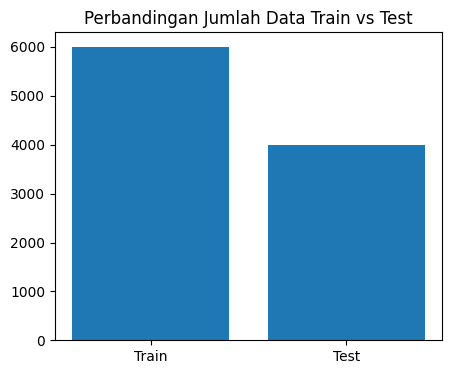

In [24]:
plt.figure(figsize=(5,4))
plt.bar(["Train", "Test"], [len(train), len(test)])
plt.title("Perbandingan Jumlah Data Train vs Test")
plt.show()


In [25]:
features = [
    'followers_count','friends_count','post_count',
    'default_profile_image','profile_use_background_image','verified'
]

target = "fake"


In [26]:
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

X_train = normalize(train[features]).values
y_train = train[target].values

X_test = normalize(test[features]).values
y_test = test[target].values

In [29]:
def step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [33]:
def train_slp(X,y, lr=0.1, activation='step', epoch=100):
    weights = np.zeros(X.shape[1])
    bias = 0

    for _ in range(epoch):
      for i in range(len(X)):
        z = np.dot(X[i], weights) + bias

        if activation == 'step':
            pred = step(z)
        else:
            pred = 1 if sigmoid(z) >= 0.5 else 0

        error = y[i] - pred
        weights += lr * error * X[i]
        bias += lr * error

    return weights, bias

In [31]:
def evaluate(X, y, w, b, activation='step'):
    correct = 0
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        pred = step(z) if activation == 'step' else int(sigmoid(z) >= 0.5)
        correct += (pred == y[i])
    return correct / len(y)


In [32]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
results_lr = []

for lr in learning_rates:
    w, b = train_slp(X_train, y_train, lr=lr)
    acc = evaluate(X_test, y_test, w, b)
    results_lr.append([lr, acc])

df_lr = pd.DataFrame(results_lr, columns=['Learning Rate', 'Accuracy'])
print("\n=== HASIL EKSPERIMEN LEARNING RATE ===")
print(df_lr)

AttributeError: module 'numpy' has no attribute 'zeroes'

In [34]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
results_lr = []

for lr in learning_rates:
    w, b = train_slp(X_train, y_train, lr=lr)
    acc = evaluate(X_test, y_test, w, b)
    results_lr.append([lr, acc])

df_lr = pd.DataFrame(results_lr, columns=["Learning Rate", "Accuracy"])
print("\n=== HASIL EKSPERIMEN LEARNING RATE ===")
print(df_lr)


=== HASIL EKSPERIMEN LEARNING RATE ===
   Learning Rate  Accuracy
0           0.01     0.934
1           0.05     0.934
2           0.10     0.934
3           0.50     0.934
4           1.00     0.934


In [35]:
activations = ["step", "sigmoid"]
results_act = []

for act in activations:
    w, b = train_slp(X_train, y_train, lr=0.1, activation=act)
    acc = evaluate(X_test, y_test, w, b, activation=act)
    results_act.append([act, acc])

df_act = pd.DataFrame(results_act, columns=["Activation Function", "Accuracy"])
print("\n=== HASIL EKSPERIMEN AKTIVASI ===")
print(df_act)



=== HASIL EKSPERIMEN AKTIVASI ===
  Activation Function  Accuracy
0                step     0.934
1             sigmoid     0.934


In [36]:
results_feat = []

for i in range(1, len(features)+1):
    w, b = train_slp(X_train[:, :i], y_train, lr=0.1)
    acc = evaluate(X_test[:, :i], y_test, w, b)
    results_feat.append([i, acc])

df_feat = pd.DataFrame(results_feat, columns=["Jumlah Fitur Digunakan", "Accuracy"])
print("\n=== HASIL EKSPERIMEN JUMLAH FITUR ===")
print(df_feat)


=== HASIL EKSPERIMEN JUMLAH FITUR ===
   Jumlah Fitur Digunakan  Accuracy
0                       1   0.76550
1                       2   0.85700
2                       3   0.92350
3                       4   0.91075
4                       5   0.93300
5                       6   0.93400
